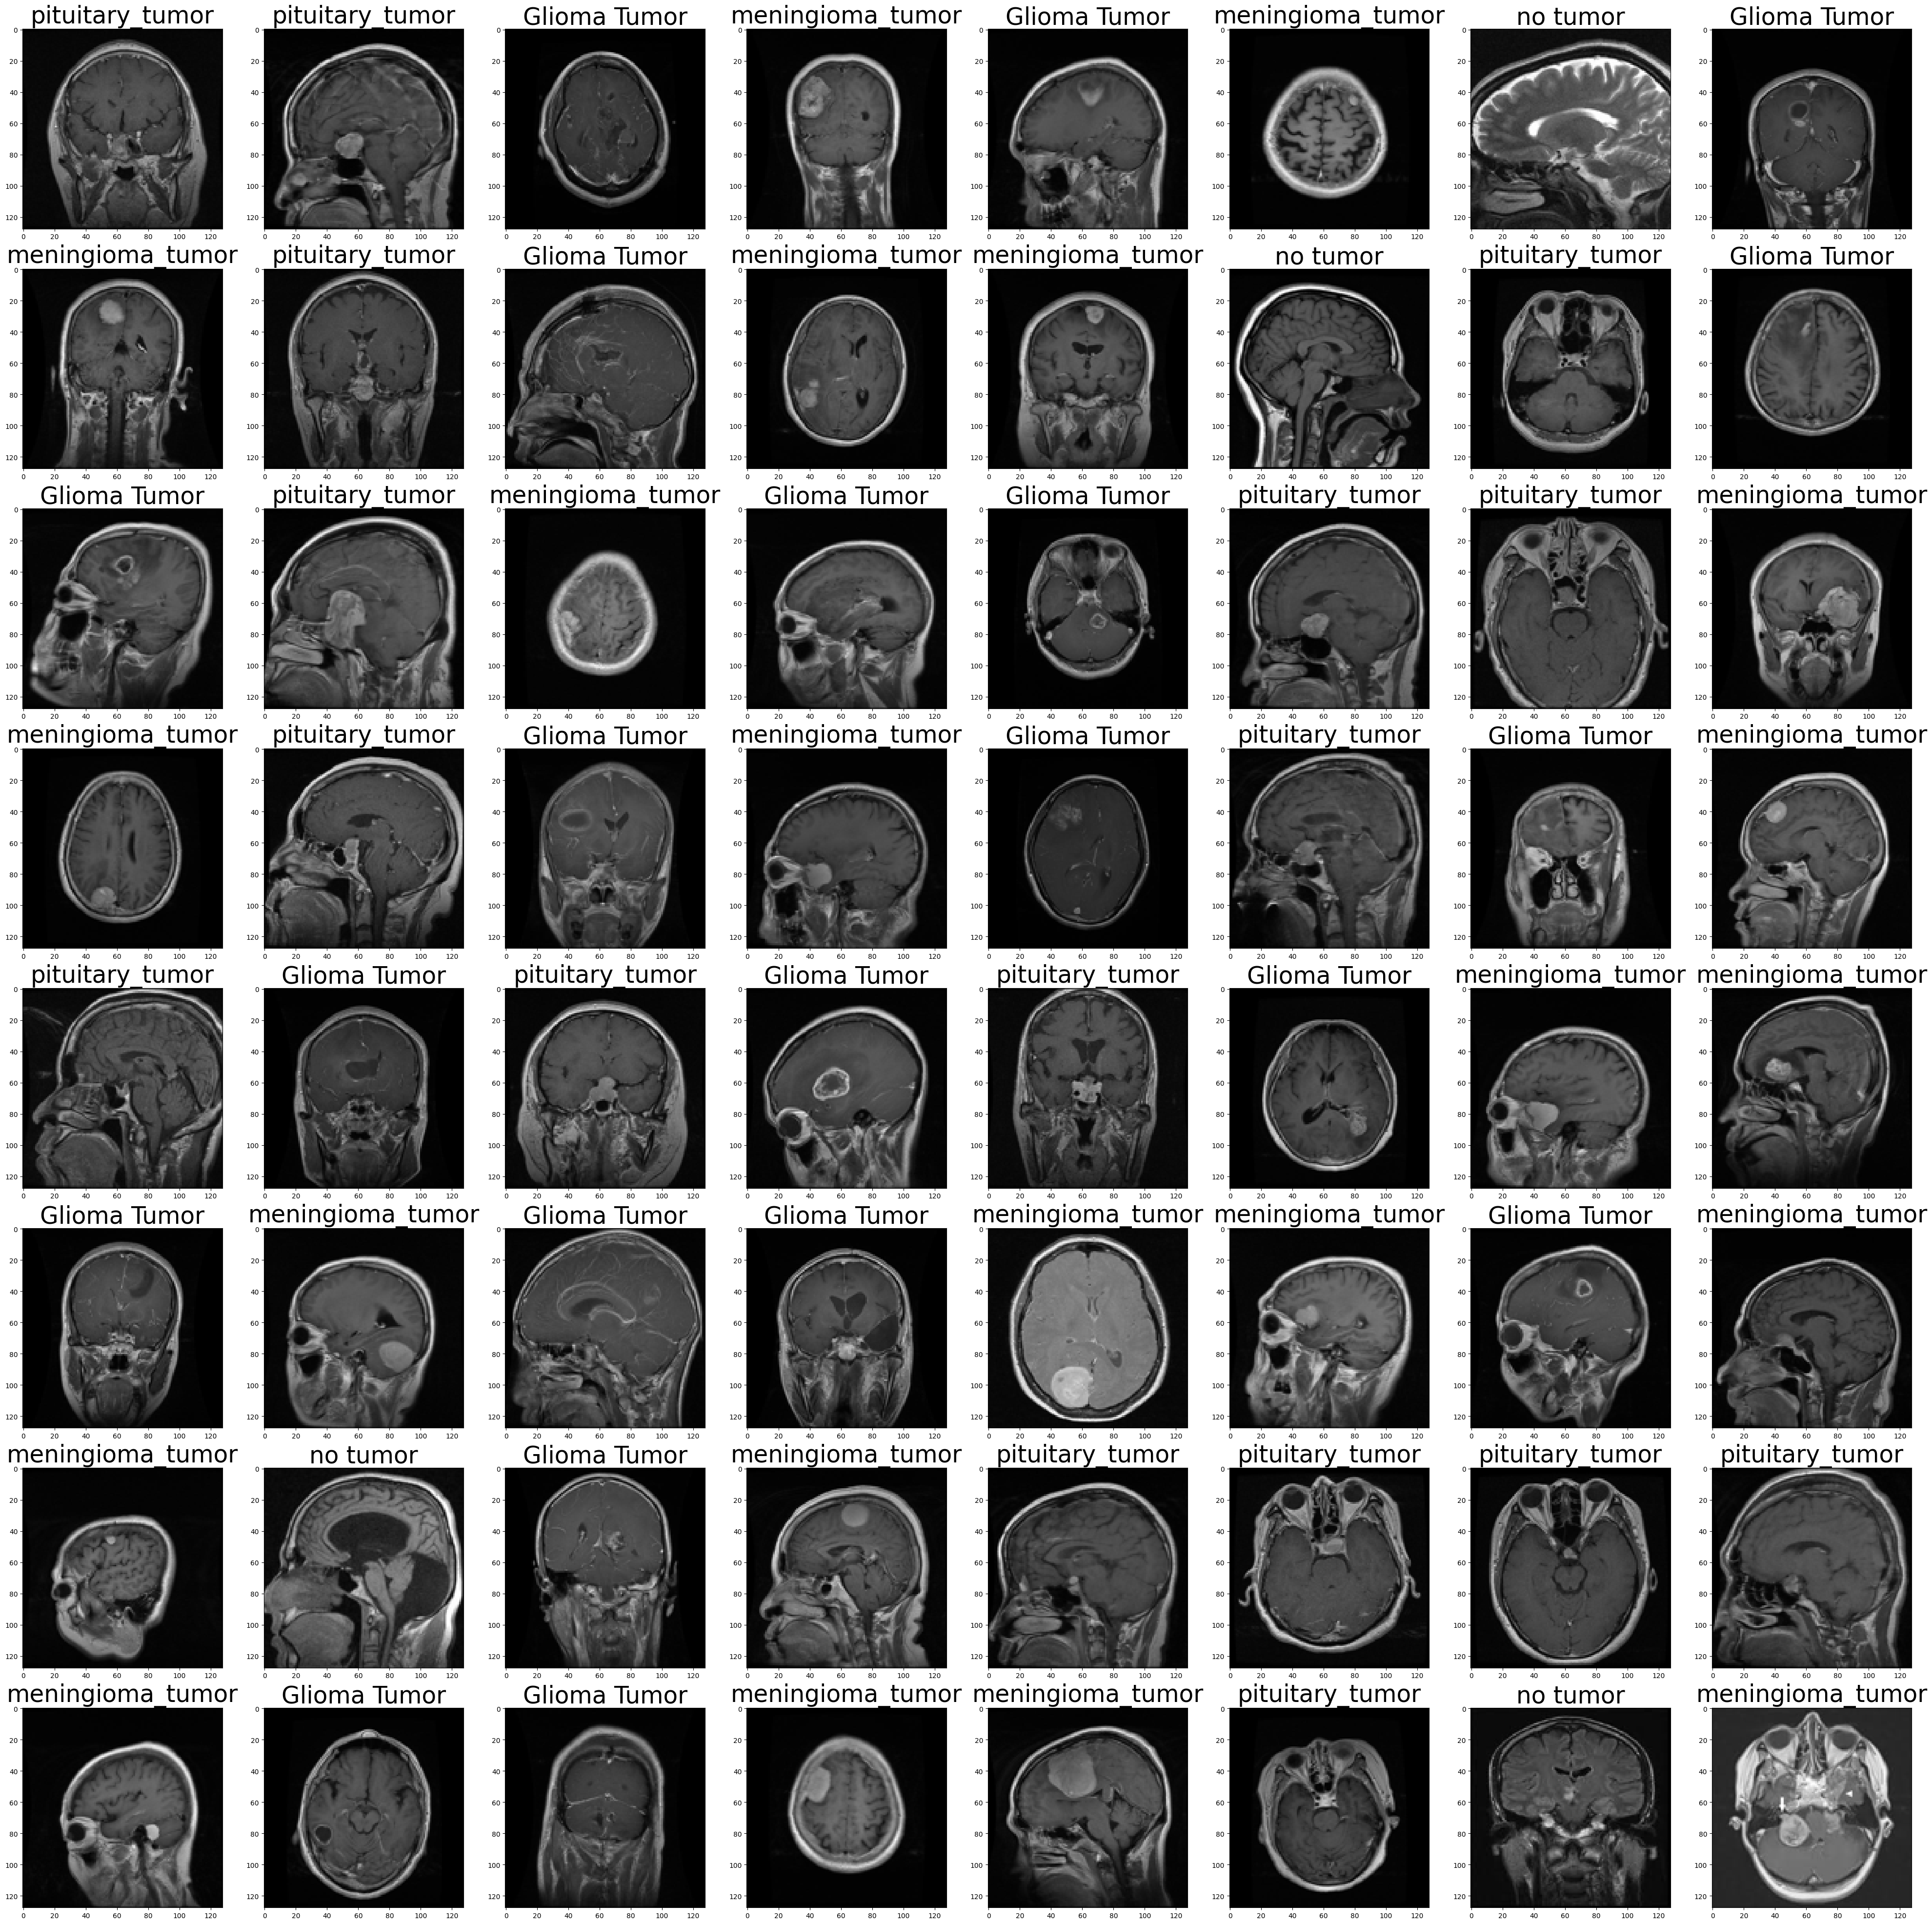

In [39]:
import random
import os

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

%matplotlib inline

training_path = 'Training'
imageData = []
imageLabel = []

# loop through the directories and files in the training data path
for r, d, f in os.walk(training_path):
    for file in f:
        if '.jpg' in file:
            # if the file is an image file, append its path to the paths_train list
            path = os.path.join(r, file)
            # use the parent directory to determine the label for the image and append it to the y list
            if 'glioma_tumor' in r:
                imageLabel.append(3)
            elif 'meningioma_tumor' in r:
                imageLabel.append(2)
            elif 'pituitary_tumor' in r:
                imageLabel.append(1)
            elif 'no_tumor' in r:
                imageLabel.append(0)
            # load the image using PIL, resize it to 128x128, and append it to the data list
            img = Image.open(path)
            img = img.resize((128, 128))
            img = np.array(img)
            if img.shape == (128, 128, 3):
                imageData.append(np.array(img))

fig = plt.figure(figsize=(50, 50))  # width, height in inches
for i in range(64):
    randomImage = random.randint(0, len(imageData)-1);
    sub = fig.add_subplot(8, 8, i + 1)
    label = imageLabel[randomImage];
    if label == 0:
        sub.set_title("no tumor", fontsize = 35)
    elif label == 1:
        sub.set_title("pituitary_tumor", fontsize = 35)
    elif label == 2:
        sub.set_title("meningioma_tumor", fontsize = 35)
    elif label == 3:
        sub.set_title("Glioma Tumor", fontsize = 35)
    sub.imshow(imageData[randomImage])